In [10]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("pqd_predictions_test01_dataset05.csv", header=0, usecols=range(2, 12))

In [12]:
df = df.dropna()

In [13]:
df.tail()

,flickers,harmonics,interruptions,interruptions_harmonics,osc_transients,sags,sags_harmonics,spikes,swells,swells_harmonics
2995,5.729749e-12,9.419878e-12,6.165581e-03,1.174499e-06,6.170437e-03,9.876599e-01,2.315088e-06,5.978582e-07,2.916543e-10,2.970713e-12
2996,5.921040e-28,1.081668e-19,0.000000e+00,9.875341e-19,1.158848e-12,0.000000e+00,9.017918e-14,3.779187e-24,1.059070e-24,1.000000e+00
2997,2.116747e-17,1.459411e-22,9.826691e-16,2.677138e-16,1.047291e-08,2.149002e-22,6.426034e-18,6.627840e-08,9.999999e-01,3.964903e-11
2998,3.018899e-11,4.429376e-06,4.355214e-08,8.924155e-01,3.123666e-07,3.747697e-08,1.075793e-01,1.886408e-13,1.282896e-12,2.684487e-07
2999,6.554258e-12,4.629142e-22,1.189226e-13,1.508209e-11,9.999999e-01,1.658964e-18,8.303682e-15,2.612912e-13,1.408355e-07,3.071884e-08


In [14]:
pca = PCA(n_components=2)
pca.fit(df)
pca_data = pca.transform(df)
pca_data

array([[-0.11521967, -0.14966003],
       [-0.11094697,  0.20512999],
       [-0.10931525, -0.1750332 ],
       ...,
       [-0.10748444, -0.19502846],
       [-0.27125864,  0.75712506],
       [-0.08859449, -0.15459442]])

In [15]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

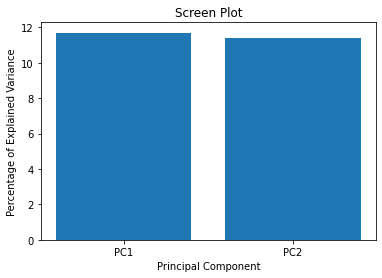

In [16]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

In [17]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2
0,-0.115220,-0.149660
1,-0.110947,0.205130
2,-0.109315,-0.175033
3,-0.136143,0.292894
4,-0.115217,-0.149672
...,...,...
2995,0.120291,-0.005752
2996,-0.109315,-0.175033
2997,-0.107484,-0.195028
2998,-0.271259,0.757125


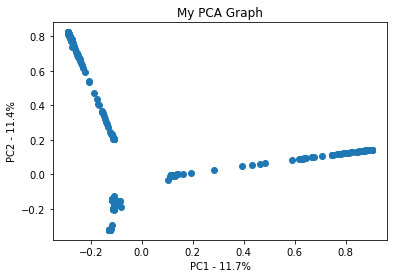

In [19]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
# plt.axis([0, 1, 0, 1])
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()